### Análise Estratégica: Branding Internacional e Diversificação de Receita
  
Autor: Daniel Amorim  
e-mail: dsamorim686@gmail.com  
LinkedIn: linkedin.com/in/danieloamorim  
  
Este projeto é parte da análise de dados de e-commerce internacional para construir  
uma base sólida de apoio às decisões de Branding e Expansão. O objetivo é reduzir a  
dependência do mercado doméstico e fortalecer a margem de lucro nos mercados  
onde a marca ainda tem potencial de crescimento.
  
A metodologia combina a leitura geral do desempenho por país com análises  
detalhadas do comportamento do cliente através do modelo RFM.  
A partir dessa integração, serão definidos os pilares que sustentam as principais decisões estratégicas.
    
**Pilares Estratégicos e Perguntas-Chave:**  
  
- Otimização do Portfólio de Mercados:  
Como distinguir os mercados que representam maior valor por cliente daqueles que  
se destacam pelo volume gerado mas com maior risco de perda?
  
- Segmentação Prática de Clientes (RFM):  
Quais são os clientes mais valiosos e quais demonstram sinais de abandono?  
Como ajustar o branding e as ações de marketing digital com base nesses perfis?
  
- Produtos e Branding em Alinhamento:  
Quem são os produtos mais e menos valiosos?
Como ajustar o branding e as ações de marketing digital com base nesses perfis?
  
- Produtos e Branding em Alinhamento:  
Quais produtos realmente impulsionam o faturamento e a frequência de compra?  
Como devem ser posicionados dentro das estratégias de conteúdo e aquisição?
  
- Sazonalidade e Decisões de Investimento:  
De que forma a sazonalidade anual deve orientar o planeamento de mídia e a  
preparação de stock para maximizar o retorno nos períodos de maior procura e  
fortalecer a presença nos momentos de menor concorrência?  
  
Este projeto procura transformar os resultados da análise em orientações práticas para proteger a receita existente e abrir caminho de crescimento rentável internacionalmente.

### 1. Importação de bibliotecas e leitura do dataset:

In [29]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Configuração global de visualizações gráficas:
sns.set_style("whitegrid")
plt.rcParams.update({
    'figure.figsize': (12,6),
    'axes.titlesize': 16,
    'axes.labelsize':12,
    'legend.fontsize': 11,
    'ytick.labelsize': 11
})

#Leitura do dataset:
file_path = r"C:\projetos\bancos\online_retail\online_retail_09_10.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


**1.1 Exploração inicial e informações gerais:**  
  
objetivo: avaliar a qualidade dos dados, tipos de colunas e valores ausentes.

In [30]:
print("Informações gerais do dataset:\n")
print(df.info())

print("\nEstatísticas Descritivas:\n")
print(df.describe(include='all'))

print("\nValores Ausentes:\n")
print(df.isnull().sum())

Informações gerais do dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿InvoiceNo  525461 non-null  object 
 1   StockCode     525461 non-null  object 
 2   Description   522533 non-null  object 
 3   Quantity      525461 non-null  int64  
 4   InvoiceDate   525461 non-null  object 
 5   UnitPrice     525461 non-null  float64
 6   CustomerID    417534 non-null  float64
 7   Country       525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB
None

Estatísticas Descritivas:

       ï»¿InvoiceNo StockCode                         Description  \
count        525461    525461                              522533   
unique        28816      4632                                4681   
top          537434    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq            675      3516                 

**Comentário:**  
  
O dataset apresenta algumas inconsistências típicas de dados:
- Coluna InvoiceNo contém caracteres inválidos
- CustomerID possui cerca de 20% de valores ausentes
- Números negativos em Quantity e UnityPrice, o que pode significar devoluções
- InvoiceDate em formato object
  
Para garantir qualidade das análises será necessário corrigir os dados,  
permitindo a exploração confiável do comportamento de vendas e receita.

### 2. Limpeza e preparação dos dados:  
Garantir que todos os dados estejam consistentes e prontos para análise

In [31]:
#Corrigir nomes de colunas:
df.rename(columns=lambda x: x.strip().replace('ï»¿', ''), inplace=True)

#Remover registos sem CustomerID ou InvoiceNo (criando cópia real):
df_clean = df.dropna(subset=['CustomerID', 'InvoiceNo']).copy()

#Converter colunas de data para datetime:
df_clean.loc[:, 'InvoiceDate'] = pd.to_datetime(
    df_clean['InvoiceDate'], dayfirst=True, errors='coerce'
)
#Remover datas inválidas (NaT) para garantir análises temporais confiáveis:
df_clean = df_clean.dropna(subset=['InvoiceDate']).reset_index(drop=True)

#Ordenar o dataframe pela data para evitar distorções em análises e gráficos:
df_clean = df_clean.sort_values(by='InvoiceDate').reset_index(drop=True)

#Criar coluna de receita:
df_clean.loc[:, 'Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

#Filtrar apenas vendas positivas:
df_clean = df_clean[df_clean['Revenue'] > 0].reset_index(drop=True)

#Criar dataframe somente com os produtos comercializáveis:
df_commercial = df_clean[~df_clean['Description'].str.upper().str.contains(
    'FREIGHT|POSTAGE|TEST|RETURN|MANUAL|DOTCOM POSTAGE'
)].copy()

print("DataFrame 'df_commercial' recriado e pronto para análise.")

DataFrame 'df_commercial' recriado e pronto para análise.


Na preparação e filtragem dos dados foram aplicadas as seguintes etapas:

- Registos sem CustomerID ou InvoiceNo foram removidos, garantindo que cada venda seja associada a um cliente. Mesmo que um cliente tenha feito várias compras, cada transação válida permanece registada  mantendo a consistência das análises por cliente e fatura.
  
- Datas inválidas (NaT) foram eliminadas para permitir análises temporais confiáveis.
  
- Foi criada a coluna Revenue multiplicando Quantity por UnitPrice, permitindo medir o valor real de  cada venda.
  
- Foram filtradas apenas vendas positivas, evitando que valores negativos ou zerados distorcessem a análise.
  
- Foi criado o DataFrame df_commercial, eliminando registos suspeitos (como frete, portes e  
testes) para garantir que as métricas de vendas e receita considerem apenas transações reais de  
stock.

### 3 - Análise de Mercado: Receita e Potencial de Crescimento:
Como ponto de partida para a definição da estratégia de branding e expansão internacional,  
é essencial compreender quais mercados apresentam maior valor e potencial de crescimento.
  
Combinar o volume de vendas (Receita Total) e o valor médio por transação (Ticket Médio - AOV)  
permite a identificação não apenas de onde a marca já tem impacto significativo,  
mas também onde existe margem para o aumento da rentabilidade.

**3.1 Receita por País (Top 5)**  
  
Objetivo em analisar, identificar e quantificar os cinco mercados que atualmente geram a maior Receita Total. Avaliar o desempenho por país garante o reconhecimento de onde a marca possui maior atração comercial e contribui na compreensão da distribuição real do volume de vendas.  
    
Este ponto da análise orienta decisões estratégicas de expansão, priorização de mercados e alocação 
de recursos, permitindo o direcionamento da análise nos países que já demonstram fortes comportamentos de compra e maiores retornos financeiros.

In [54]:
#Agrupar receita por país e identificar top 5:
top5_countries = df_commercial.groupby('Country', as_index=False)['Revenue'].sum()
# Filtro para os Top 5:
top5_countries = top5_countries.sort_values('Revenue', ascending=False).head(5)

#Gráfico interativo:
fig = px.bar(
    top5_countries,
    x='Country',
    y='Revenue',
    text='Revenue',
    color='Revenue',
    title='Top 5 Países por Receita',
    color_continuous_scale='Blues'
)

fig.update_traces(texttemplate='€%{text:,.0f}', textposition='outside')
fig.update_layout(
    xaxis_title='País',
    yaxis_title='Receita Total (€)',
    showlegend=False,
    template='plotly_white'
)

fig.show()

**Análise do Top 5 Países por Receita:**  
  
O gráfico demonstra uma concentração significativa de receita no mercado de origem.  
- O Reino Unido é o lider, gerando 3.115.380 de receita total.
- Os outros quatro países (EIRE, Países Baixos, Alemanha e França) juntos geram apenas € 422.536 (€ 162.769 + € 97.005 + € 84.972 + € 77.082).
- A receita do Reino Unido é aproximadamente 7,4 vezes maior que a soma dos outros quatro países.
  
A distribuição indica uma dependência do Reino Unido, qualquer instabilidade económica, política ou mudança intensa na concorrência pode representar um risco para a sustentabilidade do negócio.
  
O Reino Unido precisa centrar no objetivo de otimização e retenção. Mas o foco de crescimento deve ser direcionado para a diversificação nos mercados secundários.  
Embora os países secundários gerarem receitas inferiores, acabam por representar o potencial de crescimento, o que possibilita uma redução na dependência.  
  
EIRE (Irlanda) destaca-se como o segundo mercado, com receita quase o dobro do Países Baixos.  
Indica que pode haver uma afinidade cultural ou logística com o mercado do Reino Unido que pode ser explorada futuramente.
  
Alemanha e França, sendo grandes economias europeias, geram receitas baixas.  
Isso sugere que há um potencial inexplorado nesses mercados, seja por baixa penetração (poucos clientes) ou por baixo valor de transação (baixo Ticket Médio).

**3.2 Ticket Médio (AOV) por País**  
  
O objetivo desta análise é identificar os países com maior valor médio por transação (AOV), destacando os mercados mais predispostos a compras de maior valor. Os paises identificados com os maiores valores médios por transações podem diferir dos países líderes em Receita Total, o que revela mercados que apesar de apresentarem volume menor de transações, possuem elevado potencial de margem que podem ser alvos de estratégicos para a introdução de produtos premium ou linhas de maior valor agregado.
  
Metodologia do cálculo:  
  
- Agrupamento: Agrupar dados por Country (País).  
- Agregação: Calcular a soma da Receita (Revenue) e a contagem de transações únicas (InvoiceNo) para obter o resultado de transações.  
- Cálculo do AOV: Divisão da Receita Total pelo número de transações para estimar o valor médio de compras por país.
- Seleção: Ordenação dos países pelo AOV e identificação dos mercados com valores mais altos.
  
Essa abordagem permite identificar e reconhecer mercados de maior predisposição ao gasto unitário, essenciais para fundamentar decisões sobre posicionamento, precificação e priorização de marketing.

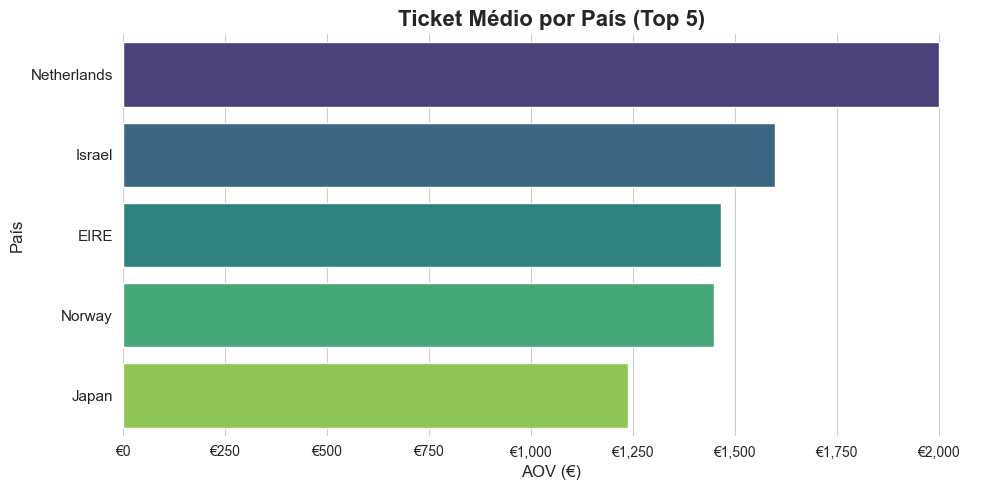

In [55]:
#Base de resumo por país:
country_summary = (
    df_clean.groupby('Country')
    .agg(
        Revenue=('Revenue', 'sum'),
        Transações=('InvoiceNo', 'nunique')
    )
    .reset_index()
)

country_summary['AOV'] = country_summary['Revenue'] / country_summary['Transações']
country_summary = country_summary.sort_values('AOV', ascending=False)


#Gráfico do Ticket Médio (Top 5):
plt.figure(figsize=(10,5))
sns.barplot(
    data=country_summary.head(5),
    x='AOV',
    y='Country',
    hue='Country',
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title("Ticket Médio por País (Top 5)", weight='bold')
plt.xlabel("AOV (€)")
plt.ylabel("País")

plt.gca().xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'€{x:,.0f}')
)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

**Análise dos Resultados: Ticket Médio (AOV por país):**  
  
A liderança dos Países Baixos (aprox. € 2.000) e a forte presença de Israel e EIRE transparece a existencia de público-alvo disposto a pagar valores elevados por transações.  
Estes mercados evidenciam comportamentos premium e mostram a capacidade de absorver linhas de preço maiores ou até mesmo produtos exclusivos.
    
Destacam-se os países Israel, Noruega e Japão com bons números de AOV, mas estes países não são refletidos nos volumes de receita total. Nestes países interpreta-se que o problema não está centrado no valor gasto por transação mas sim na quantidade reduzida de transações.

**3.3 Análise Cruzada: Receita vs. Ticket Médio (AOV):**  
  
  Notas Importantes
- Volume (eixo horizontal): número total de transações e amplitude da base de clientes.  
- Valor (eixo vertical): gasto médio por transação (AOV).  
  
A combinação determina o posicionamento estratégico de cada país dentro do portfólio.

In [56]:
#Lista de países a serem analisados:
paises_selecionados = ['United Kingdom', 'EIRE', 'Netherlands', 'Germany', 'France', 'Israel', 'Japan']
filtered_summary = country_summary[country_summary['Country'].isin(paises_selecionados)]

#Recalculo das médias apenas para os países filtrados:
avg_revenue_filtered = filtered_summary['Revenue'].mean()
avg_aov_filtered = filtered_summary['AOV'].mean()

fig = px.scatter(
    filtered_summary,
    x='Revenue',
    y='AOV',
    text='Country',
    title='Matriz Estratégica: Receita vs. Ticket Médio (AOV)',
    hover_data=['Transações'],
    color='AOV',
    color_continuous_scale='Viridis'
)

#Eixo X mantido como linear:
fig.update_xaxes(type="linear", title='Receita Total (€)')

#Adicionar linhas dos quadrantes (baseadas nas médias dos países filtrados):
fig.add_hline(y=avg_aov_filtered, line_dash="dot", annotation_text=f"AOV Médio (€{avg_aov_filtered:,.0f})", 
              annotation_position="bottom right")
fig.add_vline(x=avg_revenue_filtered, line_dash="dot", annotation_text=f"Receita Média (€{avg_revenue_filtered:,.0f})", 
              annotation_position="top left")

fig.update_traces(textposition='top center')
fig.update_layout(
    yaxis_title='Ticket Médio (€)',
    template='plotly_white'
)
fig.show()

**Análise Cruzada: Receita vs Ticket Médio (AOV):**
  
  O Cruzamento dos dados revela o posicionamento estratégico de cada mercado.  

- **Estrema Direita (Domínio de Volume)**: O Reino Unido ($3.115.380) representa a base de clientes mais ampla e volume de transações massivo. O foco é a otimização, retenção e potencialização do valor por cliente. A dependencia sobre o Reino Unido torna a diversificação uma prioridade estratégica relevante para a sustentabilidade do negócio.
  
- **Superior Esquerdo (Domínio do Valor)**: Os países localizado nestes quadrantes (Países Baixos, EIRE, Israel e Japão) demonstram a existencia de um público-alvo disposto a pagar valores elevados por transações (AOV alto), indicando comportamentos premium e forte capacidade de absorção de linhas de preço mais elevados. A baixa Receita Total (com exceção do EIRE) indica que o volume total de pedidos é reduzido. Para estes países, o problema não é o valor gasto por cliente, mas sim a quantidade de clientes e transações. A principal alavanca de crescimento deve ser o aumento da aquisição de novos clientes e o aumento da frequência de compra.
  
- **País de Destaque no Valor e Volume Intermediário**: O EIRE (Irlanda), embora no quadrante de "Domínio do Valor" (AOV forte), destaca-se por ser o segundo mercado em Receita Total (€ 162.769) e ter um valor quase o dobro do Países Baixos em receita. Isso sugere que o EIRE combina um bom volume de transações com um AOV elevado, indicando uma afinidade cultural ou logística com o mercado do Reino Unido que deve ser explorada ativamente para maximizar o crescimento.
  
- **Inferior Esquerdo (Baixo Volume e Baixo Valor)**: Alemanha e França caem neste quadrante. Sendo grandes economias europeias, a baixa receita e baixo Ticket Médio, embora o AOV não seja definido como baixo, a baixa receita e ausência no Top 5 AOV sugere que há um potencial inexplorado nestes países. A baixa penetração de clientes, o baixo valor de transação, ou ambos, tornam estes mercados de menor relevância estratégica imediata em ambas as métricas, mas representam potencial significativo se as barreiras de entrada ou aquisição forem superadas.
  
**Tabela Estratégica dos Quadrantes:**

| **Posição**          | **Países Exemplo**                       | **Significado** |
|----------------------|-------------------------------------------|------------------------------|
| **Extrema Direita**  | **Reino Unido**                           | Domínio do Volume. Receita massiva (>$3.1M), base de clientes ampla. A posição no AOV determina o potencial de valorização. |
| **Superior Esquerdo**| **Países Baixos, EIRE, Israel, Japão**    | Domínio do Valor. AOV alto; clientes gastam muito por transação, mas o volume total de pedidos é reduzido. |
| **Inferior Esquerdo**| **Alemanha, França**                      | Baixo Volume e Baixo Valor. Menor relevância estratégica em ambas as métricas. |
---

### 4. Segmentação de Clientes (RFM) nos Países Foco
A segmentação RFM é uma ferramenta de marketing e análise de dados que visa classificar clientes com base nos hábitos de compra dos consumidores. Ela permite identificar os clientes mais valiosos, engajados e com maior probabilidade de responder as ações de marketing.    
Em um contexto de internacionalização, a Segmentação RFM apoia a personalização estratégica, a otimização de recursos e a identificação de potencial de crescimento.

**4.1 Filtragem e Cálculo das Métricas RFM**  
  
Para contextualizar a análise de valor e volume, o método RFM será aplicado a quatro países (target_countries) selecionados com base nas análises anteriores de Receita e AOV:  
- Reino Unido (Domínio do Volume),  
- EIRE e Países Baixos (Domínio do Valor),  
- Alemanha (Potencial Inexplorado).
      
O processo de cálculo do RFM segue o seguinte método:  
  
- Associação do Cliente:  
Cada cliente é associado ao seu país de maior frequência de compra,  
garantindo uma base estável para a análise segmentada.
    
- Definição da Data de Referência (snapshot_date):  
A data de referência é definida como o dia seguinte à última transação no dataset, garantindo que a Recência (R) seja calculada corretamente em dias.
  
- Cálculo das Métricas:  

| Métrica     | Descrição                                               | Interpretação            |
|-------------|-----------------------------------------------------------|---------------------------|
| Recência (R) | Número de dias desde a última compra                     | Quanto menor, melhor      |
| Frequência (F) | Número único de transações (InvoiceNo)                 | Quanto maior, melhor      |
| Monetary (M) | Soma total da receita gerada pelo cliente (Revenue)      | Quanto maior, melhor      |


In [57]:
#Definir países de interesse:
target_countries = ['United Kingdom', 'EIRE', 'Netherlands', 'Germany']

#Associar cada cliente ao país mais frequente (base limpa df_commercial):
customer_country = (
    df_commercial.groupby('CustomerID')['Country']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)
customers_interest = customer_country[customer_country['Country'].isin(target_countries)]

#Filtrar dataset para clientes (df_target):
df_target = df_commercial[df_commercial['CustomerID'].isin(customers_interest['CustomerID'])].copy()
df_target['InvoiceDate'] = pd.to_datetime(df_target['InvoiceDate']) # Garantir datetime

#Definir data de referência:
max_date = df_target['InvoiceDate'].max()
snapshot_date = max_date + pd.Timedelta(days=1)

#Construção da RFM:

rfm_interest = df_target.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('Revenue', 'sum')
).reset_index()

rfm_interest.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

#Associar países:
rfm_interest = rfm_interest.merge(
    customers_interest[['CustomerID', 'Country']], 
    on='CustomerID', 
    how='left'
)

print("RFM BASE CALCULADO:\n")
print(f"Total de Clientes Analisados: {rfm_interest.shape[0]}")
print("\nEstatísticas Descritivas das Métricas RFM:\n")
print(rfm_interest[['Recency', 'Frequency', 'Monetary']].describe().round(1))

RFM BASE CALCULADO:

Total de Clientes Analisados: 2800

Estatísticas Descritivas das Métricas RFM:

       Recency  Frequency  Monetary
count   2800.0     2800.0    2800.0
mean     157.9        2.7    1231.0
std      146.5        4.1    5119.6
min        1.0        1.0       1.3
25%       38.0        1.0     247.5
50%      125.0        2.0     482.3
75%      224.0        3.0    1042.9
max      699.0       74.0  181661.6


**Conclusão dos Resultados Descritivos:**
  
Os resultados descritivos da análise RFM consolidada (2.804 clientes) confirmam a base de clientes com potencial alto de valorização, mas que precisam de estratégias para o alto da frequência de compra e reaquecimento no posicionamento de mercado.
    
A média de frequência (2.7) é considerada baixa, indicando que a maioria dos clientes realizaram poucas compras (a mediana é de apenas 2.0). Isso indica a necessidade de migração do foco estratégico para o aumento da frequência de compra e lealdade nos mercados secundários.
    
A média de recência (157.8 dias) indica que, em média, os clientes não estão ativos no site. Mais de 50% dos clientes (3º Quartil: 224 dias) estão há mais de quatro meses sem comprar, o que sugere o risco de churn (abandono) e a necessidade de campanhas de ativação robustas.
  
A média de Monetary (Valor Monetário) de €1234.1 é significativamente distorcida pela quantidade de outliers de valor alto, o máximo atinge €181.661,6. A diferença entre a média e a mediana (482,9) sugere que a receita está concentrada em um pequeno grupo de clientes VIP's.
  
Ao cruzarmos estas informações com o tópico anterior, Receita e AOV do Reino Unido e Países Baixos que são impulsionadas por poucos clientes de altíssimo valor, conseguiremos validar a urgência da segmentação para separar e proteger os top-tier customers enquanto se trabalha na aquisição e frequência do restante da base de clientes.

**4.2 Atribuição de Scores (Quintis)**  
  
A atribuição de scores é fundamental para a transformação das métricas brutas (Recência, Frequência e Monetário) em escalas padronizadas que podem ser comparadas, permitindo a segmentação. O método escolhido foi a utilização de Quintis (5 grupos), onde a base de clientes é dividida em cinco partes iguais para cada métrica.
    
Pontuações:
  
Frequência e Monetary:  
O quintil mais alto de clientes que compram mais vezes ou que gastam mais recebem a pontuação máxima de 5.
  
$F_{score}$: Pontuação 5 para a maior frequência.  
$M_{score}$: Pontuação 5 para o maior valor monetário.  
  
**Recência:**  
Uso de lógica invertida, sendo o quintil com o menor número de dias desde a última compra (clientes recentes) recebem a pontuação máxima de 5. A inversão é realizada com a subtração do score original de 6 (ou Q + 1):
  
$R_{score}$: Pontuação 5 para a menor recência (compra mais recente).
  
o score RFM Final é calculado pela soma simples dos scores individuais (R+F+M), resultando pontuações que variam de 3 (pior) a 15 (melhor).

In [58]:
#Score Recencia (M): 5 = Melhor (Recência menor):
rfm_interest['R_score'] = pd.qcut(rfm_interest['Recency'], q=5, duplicates='drop', labels=False) + 1
# Inverter o score de Recência:
rfm_interest['R_score'] = 6 - rfm_interest['R_score'] 

#Score Frequencia (F): 5 = Melhor (Frequência maior):
rfm_interest['F_score'] = pd.qcut(rfm_interest['Frequency'], q=5, duplicates='drop', labels=False) + 1

#Socore Monetário (M): 5 = Melhor (Monetário maior):
rfm_interest['M_score'] = pd.qcut(rfm_interest['Monetary'], q=5, duplicates='drop', labels=False) + 1

#Score RFM Final (Soma Simples):
rfm_interest['RFM_Score'] = rfm_interest['R_score'] + rfm_interest['F_score'] + rfm_interest['M_score']

print("SCORES RFM ATRIBUÍDOS:\n")
print(rfm_interest[['CustomerID', 'R_score', 'F_score', 'M_score', 'RFM_Score']].head())
print("\nDISTRIBUIÇÃO DOS SCORES RFM\n")
print(rfm_interest['RFM_Score'].value_counts().sort_index())

SCORES RFM ATRIBUÍDOS:

   CustomerID  R_score  F_score  M_score  RFM_Score
0     12346.0        1        1        1          3
1     12427.0        2        1        2          5
2     12468.0        3        1        5          9
3     12471.0        4        3        5         12
4     12472.0        5        3        5         13

DISTRIBUIÇÃO DOS SCORES RFM

RFM_Score
3     202
4     289
5     345
6     331
7     343
8     287
9     259
10    206
11    163
12    177
13    198
Name: count, dtype: int64


**Análise da Distribuição dos Scores:**  
  
**Alto Risco (Score 3):**  
Pico inicial com 202 clientes no Score 3 indica um grupo significativo de clientes que estão inativos (R baixo) e/ou compraram apenas uma vez com baixo valor (F e M baixos). Este grupo representa um risco de churn (abandono) imediato e demanda campanhas de reativação urgentes.
  
**Clientes de Alto Valor (Score 12 e 13):**  
A presença de 376 clientes nos scores mais altos (12 e 13) representa a elite da base. Estes são os clientes "Champions" ou "Loyal Customers" essenciais para a sustentabilidade. Este grupo está diretamente relacionado aos outliers de alto valor identificados na secção 4.1.
    
**Concentração na Média (Scores 5 a 7):**  
A maior concentração de clientes encontra-se nos scores médios (5 a 7), refletindo a base principal que compram ocasionalmente e gastam valores moderados. O desafio estratégico será promover estes clientes para os tiers de maior frequência e valor.

**4.3 Classificação e Visualização:**

In [59]:
#Função de classificação:
def classificar(score):
    if score >= 13:
        return "Best Customers"
    elif score >= 10:
        return "Leais e Frequentes"
    elif score >= 8:
        return "Potenciais"
    elif score >= 5:
        return "Em Risco"
    else:
        return "Adormecidos"

rfm_interest['Segment'] = rfm_interest['RFM_Score'].apply(classificar)

#Segmentos de alta prioridade (para o gráfico de ranking):
alta_prioridade = ['Best Customers', 'Leais e Frequentes', 'Potenciais']

#Cálculos para visualização:
segment_base = (
    rfm_interest
    .groupby(['Country', 'Segment'])
    .agg(Total=('CustomerID', 'count'))
    .reset_index()
)

segment_ranking = (
    rfm_interest
    .groupby('Country')
    .agg(
        Total_Clientes=('CustomerID', 'count'),
        Clientes_Alta_Prioridade=('Segment', lambda x: x.isin(alta_prioridade).sum())
    )
    .reset_index()
)

segment_ranking['% Alta Prioridade'] = (
    segment_ranking['Clientes_Alta_Prioridade'] /
    segment_ranking['Total_Clientes'] * 100
)

#Tabela Dinâmica:
segment_order = ["Best Customers", "Leais e Frequentes", "Potenciais", "Em Risco", "Adormecidos"]
segment_table_pivot = (
    segment_base
    .pivot(index='Country', columns='Segment', values='Total')
    .reindex(columns=segment_order, fill_value=0)
    .reset_index()
)
segment_table_pivot['Total Customers'] = segment_table_pivot[segment_order].sum(axis=1)
cols = ['Country'] + segment_order + ['Total Customers']
segment_table_pivot = segment_table_pivot[cols]

#Visualização combinada: (gráfico % alta prioridade + tabela)
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.5, 0.5],
    specs=[[{"type": "bar"}], [{"type": "table"}]]
)

#Gráfico de barras percentual:
fig.add_trace(
    go.Bar(
        x=segment_ranking['Country'],
        y=segment_ranking['% Alta Prioridade'],
        text=segment_ranking['% Alta Prioridade'].round(1).astype(str) + '%',
        textposition='outside',
        marker_color=segment_ranking['% Alta Prioridade'],
        marker_colorscale='Teal',
        showlegend=False
    ),
    row=1, col=1
)

#Tabela completa dos segmentos:
fig.add_trace(
    go.Table(
        header=dict(
            values=segment_table_pivot.columns.tolist(),
            fill_color='teal',
            font=dict(color='white', size=12),
            align='center'
        ),
        cells=dict(
            values=[segment_table_pivot[col] for col in segment_table_pivot.columns],
            fill_color='lavender',
            align='center',
            font=dict(color='black', size=11)
        )
    ),
    row=2, col=1
)

fig.update_layout(
    title="Ranking de Qualidade de Clientes e Distribuição de Segmentos por País (Foco Estratégico)",
    height=800,
    template='plotly_white'
)
fig.show()

**Comentário sobre a Qualidade da Receita (RFM) vs. Potencial de Valor:**
  
Ao cruzarmos os dados de Valor (AOV) e Qualidade da Base (RFM) conseguimos obter insights acionáveis sobre a origem da receita e o risco de churn em cada mercado. O ranking de Qualidade de Clientes (Percentual de Alta Prioridade) serve como validador do potencial sobre:  
  
**- Domínio do Valor Confirmado (Países Baixos e EIRE):**  
A proporção significativa de clientes de Alta Prioridade (Países Baixos: 41,4%; EIRE: 38,5%) valida que o AOV elevado é sustentado pela base de alta qualidade e baixo risco. O EIRE se estabelece como o modelo de expansão ideal.  
        
A estratégia deve direcionar para a exclusividade e status para maximizar o valor e aumentar a frequência dessa base premium.
  
**- Volume Diluído (Reino Unido):**  
Apesar de dominar a Receita Total, a base de clientes tem menor percentual de Alta Prioridade (33,1%), concentrando o maior volume absoluto de clientes Em Risco (575). Isso reforça a urgência em diversificação e exige um foco em reengajamento de massa para proteger a receita da inatividade.
  
**- Desafio de Aquisição (Alemanha):** 
Tendo a menor qualidade de base (29,6% na Alta Prioridade) e a maior proporção de clientes em Alto Risco/Adormecidos (70,4% de sua base), o crescimento neste mercado exige uma estratégia de Aquisição robusta e programas imediatos de fidelização para construir um volume de clientes sustentáveis.

### 5 - Tendências, Sazonalidade e Timing de Campanhas:  
  
Analisar a Tendência e Sazonalidade responde a questão sobre "Quando devemos agir", sendo um ponto crucial para transformar insights estratégicos (o "Onde" e o "Com Quem" atuar, definidos nas secções 3 e 4) em um plano de execução com timing. A compreensão das variações da receita ao longo do tempo permite otimizar o branding, planear o estoque, a logística e identificar a sazonalidade.

**5.1 Receita Mensal Agregada e Tendência (Países Foco):**  
  
Para identificar padrões de crescimento e sazonalidade, será realizada uma análise de séries temporais com base na Receita Total agregada para os quatro países foco (Reino Unido, EIRE, Países Baixos e Alemanha).  
  
- Agregação mensal: O dataset de transações será agregado para somar a Receita Total de cada mês (YearMonth).
    
- Visualização da Tendência: A receita mensal será plotada em um gráfico de linhas para visualizar a trajetória de crescimento da empresa ao longo do período analisado.  
  
Este procedimento revelará a magnitude da sazonalidade e confirmar se a estratégia de crescimento da marca está sendo acompanhada por uma tendência positiva (crescimento consistente) ou se é altamente dependente de eventos pontuais.

In [60]:
#Tendência temporal:
df_target.loc[:, 'YearMonth'] = df_target['InvoiceDate'].dt.to_period('M')

#Agrupar e somar a receita:
monthly_revenue = (
    df_target.groupby('YearMonth')['Revenue']
    .sum()
    .reset_index()
)
#Converter 'YearMonth' de volta para string para Plotly:
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str)

fig = px.line(
    monthly_revenue,
    x='YearMonth',
    y='Revenue',
    title='Tendência da Receita Total Mensal (Países Foco)',
    markers=True
)

fig.update_traces(line=dict(color='Teal', width=3))
fig.update_layout(
    xaxis_title='Mês',
    yaxis_title='Receita Total (€)',
    template='plotly_white',
    xaxis_tickangle=-45,
    hovermode='x unified'
)
fig.update_yaxes(tickprefix='€')
fig.show()

**Análise do gráfico de tendencias da receita total mensal:**  
  
Tendência de crescimento:  
Nota-se uma trajetória ascendente na receita ao longo do período, indicando que as estratégias de mercado e o branding estão, no geral, gerando um aumento sustentável no volume de vendas nos países foco.  
  
Sazonalidade Forte: a receita é marcada por picos anuais extremamente altos. O pico de Outubro e de Novembro destacam-se de forma massiva, provavelmente devido a Black Friday ou o período pré-natalino.  
  
As campanhas de branding e os investimentos em aquisição de clientes devem ser antecipados e intensificados nos meses de Setembro e Outubro para maximizar a penetração e o retorno no pico de Novembro, garantindo que a marca esteja no top of mind do cliente antes do período de maior gasto.
      
Os meses de baixa exibem uma queda notável no final do ano (Dezembro) e lenta recuperação no inicio do ano seguinte. Este período é ideal para focar em retenção e lealdade com os clientes de Alta Prioridade (Best Customers) identificados na análise RFM, utilizando o baixo volume de transações para otimizar os processos internos.

**5.2 - Receita Mensal por País (Sazonalidade Comparada):**  
  
A análise da receita mensal por país (Sazonalidade Comparada) é crucial para entender como a sazonalidade agregada (identificada na secção 5.1) se distribui entre os mercados de Domínio de Volume (Reino Unido) e os mercados de Domínio de Valor (EIRE, Países Baixos), além do Potencial Inexplorado (Alemanha).
  
O gráfico de barras empilhadas serve para identificar picos individuais, validar o risco de dependência e ajustar o timing do branding direcionando as campanhas e os investimentos logísticos para os países que de facto impulsionam a receita em cada pico de demanda.

In [61]:
#Garantir que YearMonth é string para o eixo x:
df_target['YearMonth_str'] = df_target['YearMonth'].astype(str)

#Agrupar receita por mês e país:
monthly_country = df_target.groupby(['YearMonth_str', 'Country'])['Revenue'].sum().reset_index()

#Gráfico de barras interativo:
fig = px.bar(
    monthly_country,
    x='YearMonth_str',
    y='Revenue',
    color='Country',
    barmode='group',  # barras lado a lado
    text='Revenue',
    title='Receita Mensal por País (Interativo)',
    color_discrete_sequence=px.colors.qualitative.Set2
)

#Formatação dos valores em €:
fig.update_traces(texttemplate='€%{text:,.0f}', textposition='outside')
fig.update_yaxes(tickprefix='€', separatethousands=True)

#Layout:
fig.update_layout(
    xaxis_title='Mês',
    yaxis_title='Receita Total (€)',
    template='plotly_white',
    hovermode='x unified',
    legend_title_text='País'
)

fig.show()


**Análise do Gráfico: Receita Mensal por País:**  
  
Dominância do Reino Unido nos Picos:  
  
Para além de gerar o maior volume de receita anualmente (secção 3), também dita a sazonalidade total da empresa. Os picos de Outubro e Novembro são impulsionados pelo Reino Unido, confirmando a dependência do mercado de origem. As estratégias de branding para os meses de pico devem ser otimizadas e focadas na retenção e no alto volume no Reino Unido, que é o motor de vendas nesses períodos.
        
Estabilidade e Potencial do EIRE e Países Baixos:  
  
Os mercados de domínio do Valor (EIRE e Países Baixos) demonstram maior estabilidade e menor volatilidade comparados ao Reino Unido. EIRE favorece através de uma contribuição total menor apresentando uma receita consistente com picos menos negativos que o Reino Unido. A implicação disto é que quando os recursos não estão focados no atendimento do pico sazonal do Reino Unido, a estratégia de diversificação e o foco no crescimento da frequência (RFM) devem ser implementadas nos meses de volume mais reduzidos (inicio do ano).
      
A baixa relevância da Alemanha corrobora com a classificação como mercado de Baixo Volume e Baixo Valor (RFM inferior esquerdo). O investimento em branding e aquisição para a Alemanha deve ser experimental e de baixo custo até que se prove que o mercado alemão possa gerar volumes significativos.

### 6 - Análise de Produtos por Impacto de Receita e Frequência
  
Após entendermos onde atuar (Domínio do Volume vs. Valor) e quando atuar (Sazonalidade), o objetivo agora torna-se definir o "Com o Quê".
    
A análise de produtos é fundamental pois mapeia o verdadeiro valor do catálogo. O objetivo é ir além do que se "vende" e descobrir o que realmente gera faturamento e o que é popular em termos de volume. Ao cruzar o impacto financeiro (Receita) com a popularidade (Frequência), será possivel categorizar o portfólio, possibilitando identificar qual produto deve ser usado como "isca" em campanhas de marketing tanto para o mercado de origem (Reino Unido) quanto para campanhas de RFM (Foco na frequência).

**6.1 - Produtos de Alto Impacto Financeiro**  
    
Identificar os produtos que individualmente acumularam o maior valor em vendas.
Para garantir que análise seja precisa e justa, será aplicada uma correção de limpeza no código .str.strip() na coluna Description, para evitar que espaços em branco invisiveis acabem separando o mesmo produto em linhas diferentes.  
  
O raciocínio de programação está na combinação de duas funções cruciais: groupby('Description') e sum() na coluna Revenue. O sistema irá agrupar todas as vendas de um mesmo produto (usando a descrição como chave) e, em seguida, somar toda a receita que ele gerou no período. O método (sort_values ascending=False).head(20) entra em seguida para ordenar a lista do maior para o menor, isolando os Top 20.
  
Etapa fundamental para o projeto, pois nos diz exatamente onde o dinheiro está concentrado, permitindo que as decisões de investimento em branding para os mercados de Domínio do Valor estejam focadas nos itens que comprovadamente sustentam o alto Ticket Médio (AOV).

In [62]:
#Limpar espaços em branco da coluna Description:
df_commercial['Description'] = df_commercial['Description'].astype(str).str.strip()

#Produtos mais lucrativos:
product_revenue = (
    df_commercial.groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(20)
)
product_revenue_df = product_revenue.reset_index()
product_revenue_df.columns = ['Description', 'Revenue']


#Gráfico de Barras:
fig = px.bar(
    product_revenue_df,
    x='Revenue',
    y='Description',
    orientation='h',
    title='Top 20 Produtos por Receita Total (€)',
    color='Revenue',
    color_continuous_scale='Teal'
)

fig.update_traces(texttemplate='€%{x:,.0f}', textposition='outside')
fig.update_layout(
    xaxis_title='Receita Total (€)',
    yaxis_title='Produto',
    template='plotly_white',
    yaxis={'categoryorder': 'total ascending'},
    #Adicionar margem automática no eixo Y:
    margin=dict(l=50, r=50, b=50),
    yaxis_automargin=True
)
fig.show()

**Análise dos Resultados: Top 20 Produtos por Receita Total**  
  
Ao analisarmos o gráfico, o primeiro ponto de maior relevância é que o WHITE HANGING HEART T-LIGHT HOLDER lidera a lista, acima até mesmo de itens fortes como o REGENCY CAKESTAND 3 TIER. Isso é uma descoberta importante para a análise pois muda a perceção sobre o catálogo de produtos.
    
O facto de um item muito popular em termos de volume estar no topo do faturamento significa que ele não é apenas uma "isca"; ele é o Carro-Chefe completo da marca, capaz de gerar tanto volume quanto valor. O JUMBO BAG RED RETROSPOT segue a mesma lógica, consolidam-se como um dos principais geradores de receita.
  
A concentração de valor nesses produtos de destaque valida a estratégia de focar em mercados com alto Ticket Médio (AOV), como Países Baixos e EIRE. O desempenho financeiro desses itens prova que a marca tem produtos de valor aceites pelo mercado, e são eles que devem ser o ponto de foco da comunicação. Se esses produtos são os que mais geram receita, eles precisam ser a prioridade número um em termos de estoque e de promoção.

**6.2 - Produtos de Alta Frequência (Volume)**
  
Esta secção tem como objetivo entendermos o comportamento de compra dos clientes,  
identificando quais produtos são os mais populares em termos de volume de transações.
  
O raciocínio utilizado será direto e eficiente, em vez de somar os valores, serão contadas as ocorrências. O método df_commercial['Description'].values_counts() irá varrer a coluna de nomes dos e contará quantas vezes cada um foi vendido, sem a preocupação com o preço.
Em seguida, .head(20) entregará os 20 produtos que tiveram o maior número de transações.  
Essa métrica de frequência é fundamental para mostrar quais produtos são bons para atrair ou reativar clientes. Eles servem como 'iscas' de baixo risco e são o ponto de partida para as campanhas de aumento de Recorrência e Frequência, que é o desafio presente na base de dados (média de frequência de 2.7).

In [63]:
#Top 20 produtos mais frequentes:
top_products_frequency = df_commercial['Description'].value_counts().head(20)
top_products_frequency_df = top_products_frequency.reset_index()
top_products_frequency_df.columns = ['Description', 'Count']

#Gráfico de barras:
fig = px.bar(
    top_products_frequency_df,
    x='Count',
    y='Description',
    orientation='h',
    title='Top 20 Produtos por Frequência de Venda',
    color='Count',
    color_continuous_scale='Mint'
)

fig.update_traces(texttemplate='%{x:,.0f}', textposition=['outside'])
fig.update_layout(
    xaxis_title='Contagem de Transações',
    yaxis_title='Produto',
    yaxis={'categoryorder': 'total ascending'},
    template='plotly_white',
    #Adicionar margem automática no eixo Y:
    margin=dict(l=50, r=50, b=50),
    yaxis_automargin=True
)

fig.show()

**Análise dos Resultados: TOP 20 Produtos por Frequência de Venda:**  
  
A observação do gráfico mostra o que está no cesto de compras da maioria dos clientes. Se no ranking de Receita o critério era o valor, aqui o critério é a popularidade.
    
WHITE HANGING HEART T-LIGHT HOLDER: já esteve como em destaque no topo da Receita, aparece novamente, confirmando a posição como Carro-Chefe da marca, um item que gera alto volume e alto valor.  
  
O ranking de Frequencia também fornece outros produtos que são vendidos em massa, mas que podem não ter o mesmo peso no faturamento (têm um Ticket Médio Baixo), com o JUMBO BAG RED RETROSPOT e outros itens de decoração e festas. Esses produtos de Alto Volume e Baixo Ticket são a chave para resolver um problema central: a baixa frequência de compra (mediana de 2.0 compras por cliente) e a necessidade urgente de reengajar a parcela de clientes Em Risco (especialmente no Reino Unido).  
  
Esses itens populares devem ser usados ativamente como o foco principal das campanhas de e-mail marketing e reativação.

### 7 - Matriz de Posicionamento de Mercado (Receita vs. Valor):
  
Etapa de síntese estratégica com objetivo de visualizar de forma clara e classificar cada mercado-alvo (países) em relação a Receita Total (que representa o volume de vendas) e o Ticket Médio (AOV), que representa o valor que o cliente está disposto a gastar por transação.
    
Esses dados acrescentados a uma matriz facilita a identificação do posicionamento estratégico de cada país, se eles são mercados de volume, mercados de valor, ou se têm potencial inexplorado,  
que é a base para a estratégia de branding internacional.
  
A lógica de programação inicia agrupando a base de dados (df_clean) por Country. Dentro dessa agregação (.agg), serão calculadas as métricas:  
  
- Total_Revenue : Calculado pelo sum() da coluna Revenue, e será a medida de Volume/Faturamento.  
- AOV_Market: Medida de Valor. o AOV é calculado pela Receita Total dividida pelo número total de faturas únicas.  
  
Será utilizada a função lambda para somar a Revenue e, em seguida, dividir pelo nunique() de InvoiceNo (número de faturas únicas) dentro do grupo de países segmentados.  
Em seguida, será aplicado um filtro de Receita > €50.000 para remover países com poucas transações garantindo que o gráfico não seja distorcido por outliers de AOV causados por um único pedido muito grande em um mercado irrelevante. O resultado é uma matriz que validará o Dominio do Volume e o Domínio do Valor dos países.

In [64]:
#Agrupar a base completa para a matriz:
market_positioning = (
    df_clean.groupby('Country')
    .agg(
        Total_Revenue=('Revenue', 'sum'),
        AOV_Market=('Revenue', lambda x: x.sum() / df_clean.loc[x.index, 'InvoiceNo'].nunique())
    )
    .reset_index()
)

#Filtrar para países com receita significativa para não distorcer o gráfico:
market_positioning = market_positioning[market_positioning['Total_Revenue'] > 50000].copy()

fig = px.scatter(
    market_positioning,
    x='Total_Revenue',
    y='AOV_Market',
    size='Total_Revenue',
    color='Country',
    text='Country',
    title='Matriz de Posicionamento de Mercado: Volume vs. Valor (AOV)',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_traces(textposition=['top center'])
fig.update_layout(
    xaxis_title='Receita Total (Volume)',
    yaxis_title='Ticket Médio (Valor - AOV)',
    template='plotly_white'
)
fig.update_xaxes(tickprefix='€')
fig.update_yaxes(tickprefix='€')
fig.show()

**Análise dos Resultados: Matriz de Posicionamento de Mercado:**  
  
**Extrema Direita (Domínio de Volume):**  
Reino Unido isolado no extremo direito, confirmando a posição de Domínio do Volume com a maior Receita Total. A matriz mostra que a sustentabilidade do negócio ainda depende maioritariamente desse mercado,  
reforçando a urgência em diversificar, conforme concluído na análise de dependência.
  
**Superior Esquerdo (Domínio de Valor):**  
Países como Países Baixo e EIRE estão visivelmente no quadrante superior, indicando que apesar de terem um volume de receita menor que o Reino Unido, eles possuem Ticket Médio (AOV) significativamente alto.Esta é a validação final da existência de um público-alvo disposto a pagar valores premium por transação, o que faz deste país o foco ideal para uma estratégia de branding voltada para o Valor e Exclusividade.
    
**Potencial Inexplorado:**  
Países como Alemanha e França, apesar de grandes economias, aparecem no quadrante inferior esquerdo (ou baixo do filtro de €50.000), confirmando o potencial que está inexplorado, seja por baixo AOV ou baixo volume de aquisição.

### Conclusão Final do Projeto:  
  
**Estratégia e Plano de Ação Internacional**
  
O relatório sintetiza o diagnóstico de mercado e traduz as análises de Receita, AOV, RFM, Sazonalidade e desempenho de produtos num plano prático para equilibrar proteção de receita e crescimento diversificado.
  
**1. Diagnóstico Analítico: Risco e Potencial**
  
- O Reino Unido concentra o volume e gera cerca de *7,4x* mais receita do que os outros mercados combinados, criando dependência elevada. A recorrência é fraca: mediana de 2 compras e recência média de 157,8 dias, apontando para necessidade de reativação.
  
- EIRE e Países Baixos destacam-se pelo alto AOV e maior proporção de clientes de Alta Prioridade (41,4% NL; 38,5% EIRE).
    
- O Reino Unido reúne o maior número de clientes “Em Risco” (575), exigindo ação imediata.
  
---
  
**2. Estratégia de Branding por Mercado (Valor vs. Volume):**  
  
| Mercado                 | Posicionamento                      | Objetivo (RFM)                                                                             |
|------------------------|--------------------------------------|---------------------------------------------------------------------------------------------|
| EIRE e Países Baixos   | Domínio do Valor                     | Exclusividade e linhas premium; aumentar frequência na base de maior qualidade.             |
| Reino Unido            | Domínio do Volume                    | Retenção e recorrência; reduzir churn e reativar clientes “Em Risco”.                      |
| Alemanha               | Potencial Inexplorado                | Aquisição e experiência; construir lealdade a longo prazo.                                  |
  
---
  
**3. Plano Tático — Produtos, Conteúdo e Tráfego:**
  
**Produtos prioritários (Carros-Chefes):**  
WHITE HANGING HEART T-LIGHT HOLDER · JUMBO BAG RED RETROSPOT  
Estes itens lideram faturamento e frequência; são prioridade de estoque e promoção.
  
**Conteúdo (Inbound):**  
  
- EIRE / Países Baixos: branding de luxo acessível; conteúdo premium em Instagram e Blog; destaque para produtos de alto AOV e lifestyle decorativo.  
  
- Reino Unido: foco em recorrência; e-mail marketing e redes sociais com produtos de ticket mais baixo; conteúdos DIY rápidos para reativação.
  
**Tráfego Pago (Outbound):**  
  
- EIRE / Países Baixos: campanhas para aquisição de clientes de valor; lookalikes de “Champions” e “Leais”; criativos de alta qualidade.
    
- Reino Unido: retargeting massivo de segmentos inativos; campanhas de baixo custo por conversão; bundles e ofertas para estimular recompra.
  
---
  
**4. Timing e Alocação de Recursos:**
  
- Setembro e Outubro: antecipar investimento em mídia paga e organização de estoque; garantir presença forte antes do pico de Novembro.  
- Início do ano: focar na fidelização e conteúdos nos mercados de maior estabilidade (EIRE e Países Baixos), reforçando frequência e LTV fora do período de alta competição.
  
---
  
**Conclusão Estratégica Final:**
  
A gestão de branding internacional deve se comportar como um Gestor de Portfólio, construindo uma  narrativa de Valor e Exclusividade nos mercados de alto AOV (EIRE/Países Baixos) para impulsionar a  margem e a Frequência, ao mesmo tempo que executa uma comunicação de Fidelidade e Volume no mercado  doméstico (Reino Unido) para proteger a receita.  
  
Este plano executável, totalmente fundamentado em  dados (Receita, AOV, RFM e Sazonalidade), garante que cada recurso seja alocado de forma cirúrgica  maximizando o retorno financeiro e mitigando o risco de dependência.
